In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cdata=pd.read_csv("../input/dataccd/ChicagoCrimeDetective.csv",low_memory=False,index_col=0)

In [3]:
cdata.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
cdata.describe()

,ID,Beat,Year
count,1.916410e+05,191641.000000,191641.000000
mean,4.968629e+06,1258.810771,2006.134940
std,2.342997e+06,702.530465,3.520285
min,1.310022e+06,111.000000,2001.000000
25%,2.832144e+06,722.000000,2003.000000
50%,4.762956e+06,1121.000000,2006.000000
75%,7.201878e+06,1733.000000,2009.000000
max,9.181151e+06,2535.000000,2012.000000


In [5]:
cdata.dtypes

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [6]:
cdata['Date']=pd.to_datetime(cdata.Date)
cdata.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [7]:
month=cdata.Date.dt.month
cdata["Month"]=month
cdata["weekday"]=cdata.Date.dt.weekday
cdata.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


Text(0, 0.5, 'No. of Crimes')

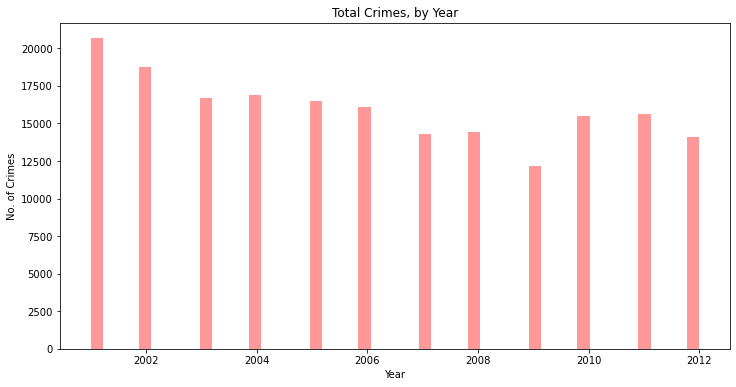

In [8]:
plt.figure(figsize=(12,6))
plt.title("Total Crimes, by Year")
sns.distplot(a=cdata["Year"],kde=False,color="red")
plt.ylabel("No. of Crimes")

Text(0, 0.5, 'No. of Crimes')

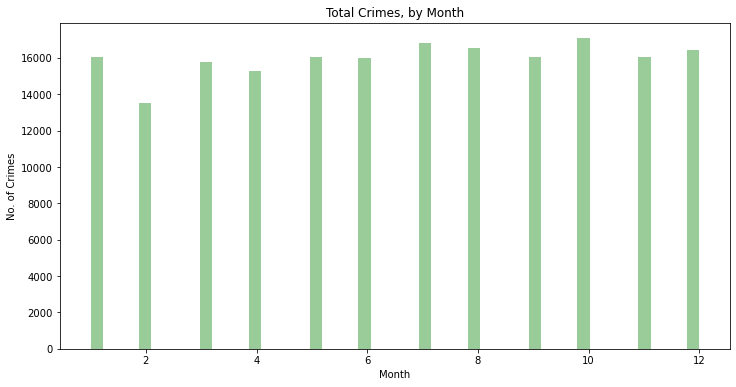

In [9]:
plt.figure(figsize=(12,6))
plt.title("Total Crimes, by Month")
sns.distplot(a=cdata["Month"],kde=False,color="green",)
plt.ylabel("No. of Crimes")

Text(0, 0.5, 'No. of Crimes')

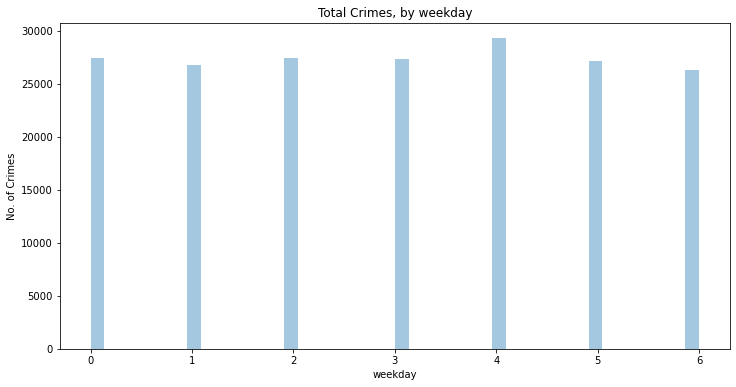

In [10]:
plt.figure(figsize=(12,6))
plt.title("Total Crimes, by weekday")
sns.distplot(a=cdata["weekday"],kde=False)
plt.ylabel("No. of Crimes")

In [11]:
cdata.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


Text(0, 0.5, 'Fraction of Arrest happens')

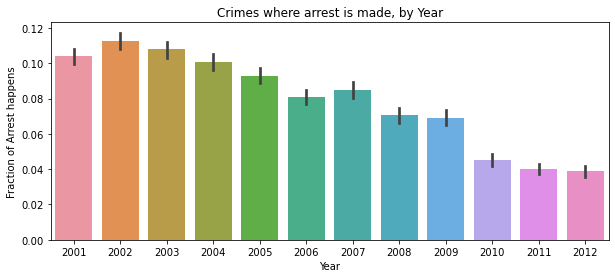

In [12]:
plt.figure(figsize=(10,4))
plt.title("Crimes where arrest is made, by Year")
sns.barplot(x=cdata["Year"],y=cdata["Arrest"])
plt.ylabel("Fraction of Arrest happens")

Text(0, 0.5, 'Domestic Crime fraction')

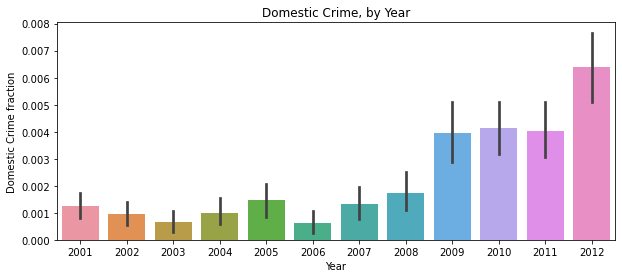

In [13]:
plt.figure(figsize=(10,4))
plt.title("Domestic Crime, by Year")
sns.barplot(x=cdata["Year"],y=cdata["Domestic"]==True)
plt.ylabel("Domestic Crime fraction")

In [14]:
ld=cdata.LocationDescription.unique()
cld=cdata.LocationDescription.value_counts()

Text(0.5, 0, 'Location')

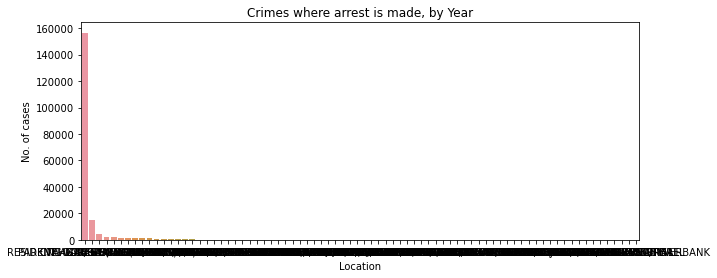

In [15]:
plt.figure(figsize=(10,4))
plt.title("Crimes where arrest is made, by Location")
sns.barplot(x=ld,y=cld)
plt.ylabel("No. of cases")
plt.xlabel("Location")

In [16]:
cld.head(20)

STREET                             156564
PARKING LOT/GARAGE(NON.RESID.)      14852
OTHER                                4573
ALLEY                                2308
GAS STATION                          2111
DRIVEWAY - RESIDENTIAL               1675
RESIDENTIAL YARD (FRONT/BACK)        1536
RESIDENCE                            1302
RESIDENCE-GARAGE                     1176
VACANT LOT/LAND                       985
VEHICLE NON-COMMERCIAL                817
SIDEWALK                              462
CHA PARKING LOT/GROUNDS               405
AIRPORT/AIRCRAFT                      363
POLICE FACILITY/VEH PARKING LOT       266
PARK PROPERTY                         255
SCHOOL, PUBLIC, GROUNDS               206
APARTMENT                             184
SPORTS ARENA/STADIUM                  166
CTA GARAGE / OTHER PROPERTY           148
Name: LocationDescription, dtype: int64

In [17]:
d=cdata.District.unique()
cd=cdata.District.value_counts()
cd

8.0     7462
25.0    6726
25      6098
8       5596
7.0     5346
9.0     5123
6.0     5006
9       4725
2.0     4606
11.0    4186
14.0    4169
4.0     4168
3.0     3759
14      3729
11      3619
17.0    3512
7       3485
6       3394
10.0    3228
17      3172
10      3146
19.0    3131
5.0     3102
2       2965
4       2905
15.0    2852
16.0    2728
19      2666
22.0    2517
3       2466
5       2466
24.0    2352
16      2231
13.0    2214
12.0    2096
18.0    2074
12      1994
15      1943
13      1799
22      1773
1.0     1623
24      1578
20.0    1378
18      1351
20      1116
1        975
21.0      29
23.0       5
           4
31.0       1
Name: District, dtype: int64